# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

signnames = np.genfromtxt('../signnames.csv', dtype=None, delimiter=',', names=True)


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
print ("Data Loaded ....")



Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Data Loaded ....


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


print(signnames)

[( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
 ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
 ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
 ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
 ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
 (10, b'No passing for vehicles over 3.5 metric tons')
 (11, b'Right-of-way at the next intersection') (12, b'Priority road')
 (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
 (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
 (18, b'General caution') (19, b'Dangerous curve to the left')
 (20, b'Dangerous curve to the right') (21, b'Double curve')
 (22, b'Bumpy road') (23, b'Slippery road')
 (24, b'Road narrows on the right') (25, b'Road work')
 (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
 (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
 (31, b'Wild animals crossing')
 (32, b'End of all speed and passing limits') (33, b'Turn right a

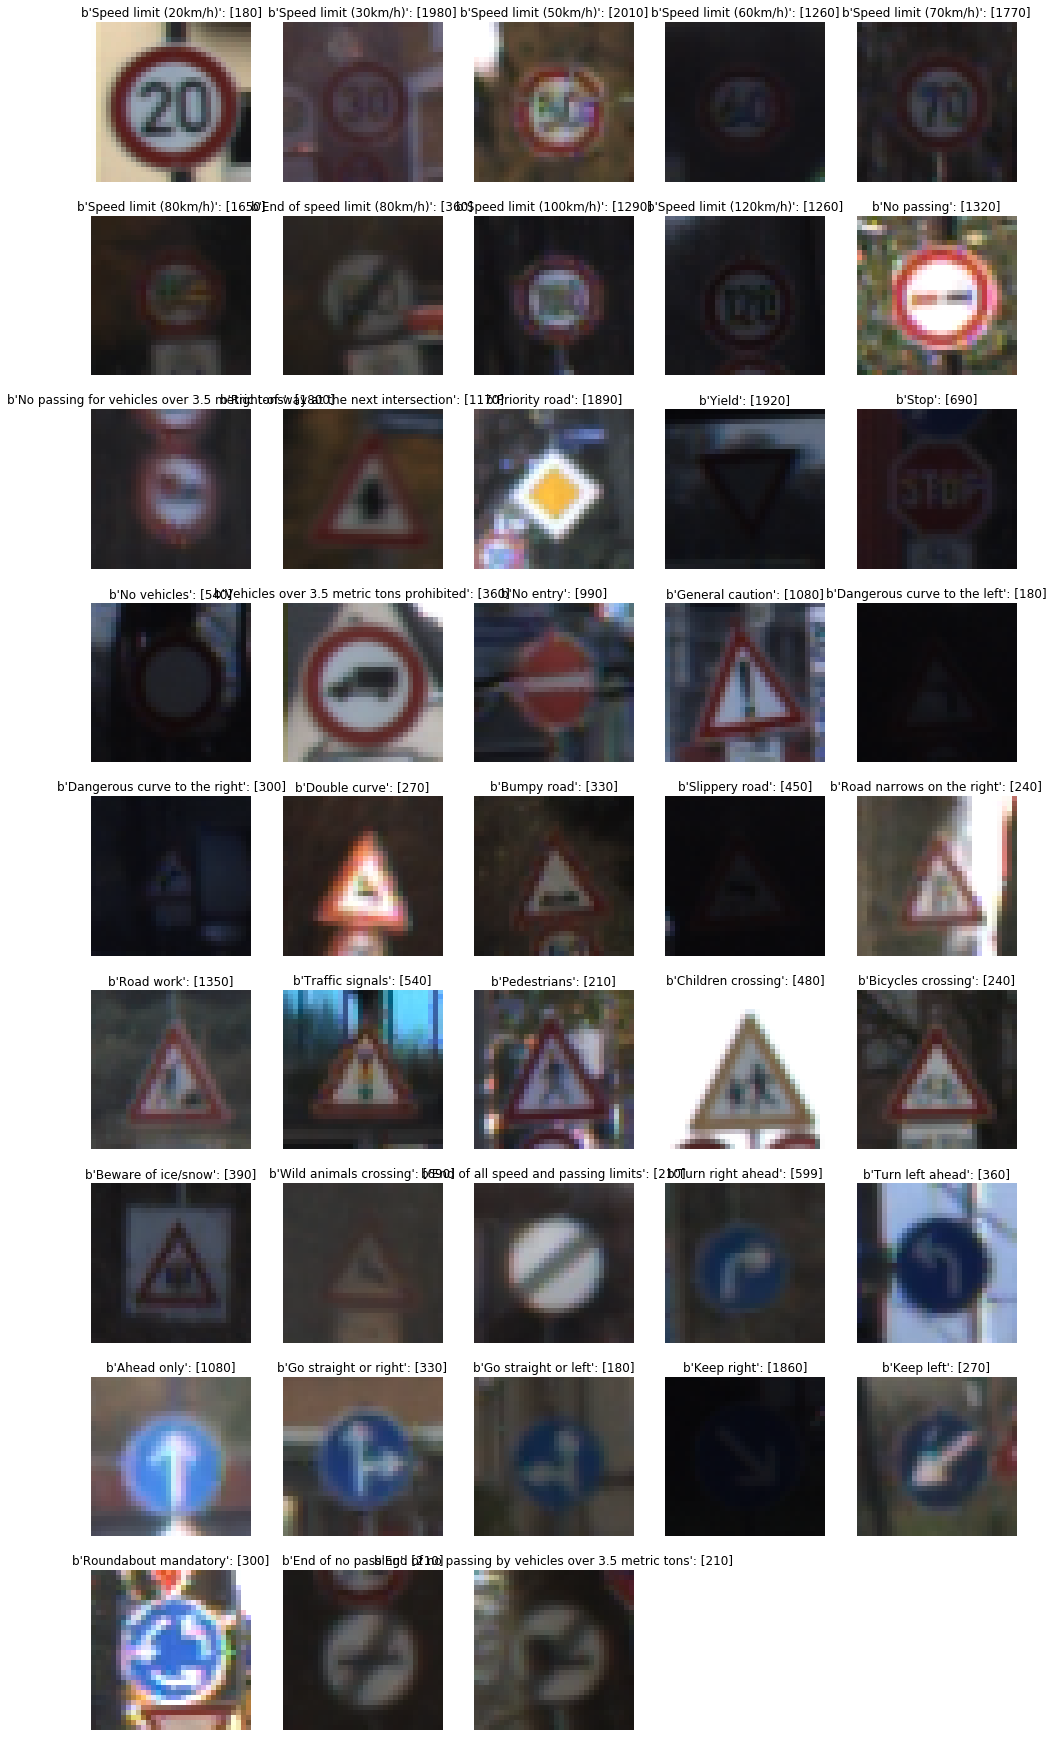

In [4]:
import random
import numpy as np

## Display images from each of the class types
import cv2
from scipy.misc import toimage

plt.subplots(figsize=(20, 35))
nrows = 10
ncols = 6

plt_row = 1
plt_col = 1
for i in range(n_classes):
    
    class_idx = np.where(y_train==i)[0][0]
    class_size = int(len(y_train[np.where(y_train==i)]))
    plt.subplot2grid((nrows, ncols), (plt_row, plt_col))
    plt.imshow(toimage(X_train[class_idx]))
    plt.axis("off")
    label = "%s: [%d]" % (signnames['SignName'][i], class_size)
    plt.title(label)
    
    plt_col += 1
    if (plt_col >= ncols):
        plt_row += 1
        plt_col = 1


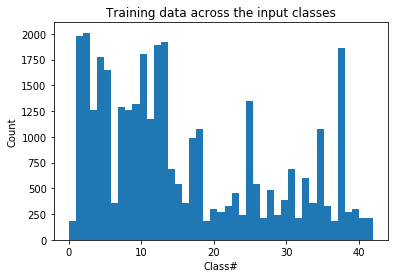

In [5]:
## Display the distribution of images classes
def show_class_distribution():
    plt.hist(y_train, n_classes)
    plt.title("Training data across the input classes")
    plt.xlabel("Class#")
    plt.ylabel("Count")
    plt.annotate
    plt.show()

show_class_distribution()

Using TensorFlow backend.


Finished rotating images
Before training size:   34799 samples
After training size:   86341 samples


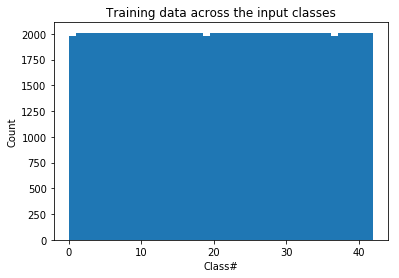

Finished one hot encoding labels
Finished normalize and augmenting data


In [6]:
#Preprocess and Augemnt the Data
from keras.utils import np_utils



def normalize(x):
    """
    Normalize a list of  image data in the range of 0 to 1 and mean center it
    : x: List of image data.  The image shape is different for each image
    : return: Numpy array of normalize data
    """
    # = a + (( x - xmin) * ( b - a))/(xmax - xmin)
    # xmax = 255, xmin = 0, a = 0, b = 1
    return (x/255.0 - 0.5)

def rotate(image, angle):
    # grab the dimensions of the image
    (h, w) = image.shape[:2]

    # calc center of image
    center = (w // 2, h // 2)
    
    scale = 1.0

    # perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    # return the rotated image
    return rotated
   
X_augment, y_augment = [], []
for image, label in zip(X_train, y_train):
    image = normalize(image)
    X_augment.append(image)
    y_augment.append(label)
#    X_augment.append(cv2.flip(image, 1))
#    y_augment.append(label)
    
#print ("Finished flipping images")

#X_augment = normalize(X_train)
#y_augment = y_train

## Add rotated images for imbalanced classes
samples_per_class = np.bincount(y_train)
angles = [-2, 2, -5, 5, -7, 7, -11, 11, -15, 15]

## Images should be 32x32
image_cols = X_train.shape[1]
image_rows = X_train.shape[2]
max_samples_count = max(samples_per_class)
for class_idx in range(n_classes):
    this_class_count = samples_per_class[class_idx]
    shortby = max_samples_count - this_class_count
    #print(" shortby : ", str(shortby))
    
    this_class_image_ids = np.where(y_train == class_idx)[0]
    for image_idx in this_class_image_ids:
        for angle in angles:
            image = X_train[image_idx]
            label = y_train[image_idx]
            rotated = rotate(image, angle)
            X_augment.append(normalize(rotated))
            y_augment.append(label)
            
            shortby -= 1
            if (shortby <= 0):
                break
            #plt.show(image)
            #plt.show(rotated)
        if (shortby <= 0):
            break

print ("Finished rotating images")

print("Before training size:   {} samples".format(len(X_train)))


#X_train = np.append(X_train, X_augment, axis=0)
#y_train = np.append(y_train, y_augment, axis=0)

X_train = np.array(X_augment)
y_train = np.array(y_augment)

X_test = normalize(X_test)
X_valid = normalize(X_valid)

print("After training size:   {} samples".format(len(X_train)))

show_class_distribution()

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
print ("Finished one hot encoding labels")


print ("Finished normalize and augmenting data")



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# Create the model

# Import Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# Need to set dim ordering to 'th' even for Tensorflow backend 
#with dim_ordering "th" data is expected as (data_x, data_y, num_channels)
#with dim_ordering "tf" data shape is expected as (num_channels, data_x, data_y)

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), subsample=(1,1), border_mode='same', activation='relu', name='conv1'))
model.add(Dropout(0.2, name='drop1'))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3), name='conv2'))
model.add(MaxPooling2D(pool_size=(1, 1), name='pool1'))
model.add(Dropout(0.2, name='drop2'))
model.add(Flatten(name='flat1'))
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3), name='dense1'))
model.add(Dropout(0.5, name='drop3'))
#model.add(Dense(96, activation='relu', W_constraint=maxnorm(3), name='dense2'))
#model.add(Dropout(0.5, name='drop4'))
model.add(Dense(n_classes, activation='softmax', name='output'))

# Compile model
epochs = 35
learn_rate = 0.01
decay = learn_rate/epochs
sgd = SGD(lr=learn_rate, decay=decay, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
conv1 (Convolution2D)            (None, 32, 32, 3)     9248        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
drop1 (Dropout)                  (None, 32, 32, 3)     0           conv1[0][0]                      
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 64, 32, 3)     18496       drop1[0][0]                      
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 64, 32, 3)     0           conv2[0][0]                      
___________________________________________________________________________________________

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Wesocket ping error if using default verbose settings
#Use keras-tqdm as workaround
#Used fix from Rohit Rawat for Keras-tqdm for fit_generator https://github.com/bstriner/keras-tqdm/issues
#Other options to set verbose=0 or redirect sys.out to file
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), nb_epoch=epochs, shuffle=True, batch_size=96, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True), reduce_lr])

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 91.61%


In [10]:
print(scores)

[0.40815505126958695, 0.91607284253302401]


dict_keys(['val_loss', 'lr', 'val_acc', 'acc', 'loss'])


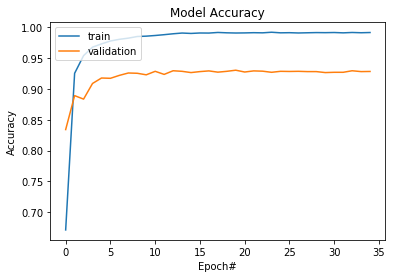

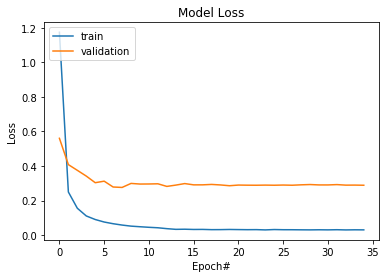

In [11]:
# list all data in history
print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch#')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch#')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
##Load Saved model from disk
from keras.models import model_from_json


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# Compile model
learn_rate = 0.01
decay = learn_rate/epochs
sgd = SGD(lr=learn_rate, decay=decay, momentum=0.9)
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


Loaded model from disk


# Visualize the Loaded Model
## Make sure graphviz is installed and present in the path (/usr/bin/dot)
Follow steps from http://stackoverflow.com/questions/36886711/keras-runtimeerror-failed-to-import-pydot-after-installing-graphviz-and-pyd

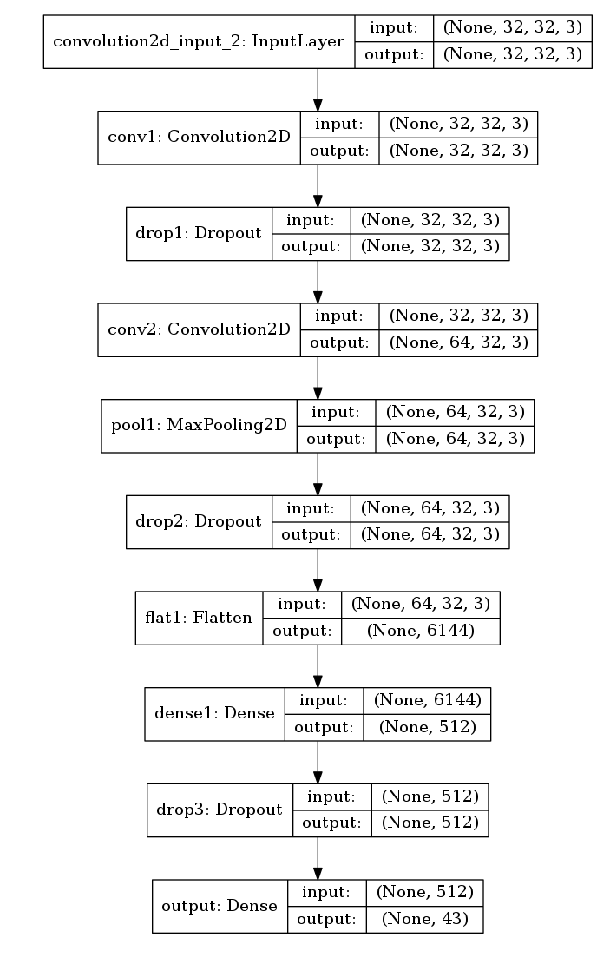

In [15]:
## Visualize the Loaded Model

import pydot_ng as pydot
from keras.utils.visualize_util import plot

plot(loaded_model, to_file='model.png', show_shapes=True)

img = cv2.imread('model.png')

# original image
plt.subplots(figsize=(10,20))
plt.subplot(111)
plt.axis('off')
plt.imshow(img)

In [16]:
# show couple of random images from the test data predictions

import random


def show_example_predictions(preds, features, labels, show_errors=False):

    # reverse one hot encoding
    predicted_labels = np.argmax(np.round(preds), axis=1)
    known_labels = np.argmax(labels, axis=1)

    # compare model predictions with known labels
    result = (predicted_labels == known_labels)

    indices = [i for i, x in enumerate(result) if x == (not show_errors)]

    # show an image from each class in a grid
    plt.subplots(figsize=(20, 35))
    for i in range(5):
        image_id = random.choice(indices)
        plt.subplot(150 + 1 + i)
        plt.imshow(toimage(features[image_id]))

        label_id = predicted_labels[image_id]
        predicted_title = signnames['SignName'][label_id]

        label_id = known_labels[image_id]
        known_title = signnames['SignName'][label_id]

        plt.title("Predicted: {}".format(predicted_title))
        plt.xlabel("Actual: {}".format(known_title))

In [19]:
# run predictions on test set
predictions = loaded_model.predict(X_test)

print("Ran predictions on test set")

Ran predictions on test set


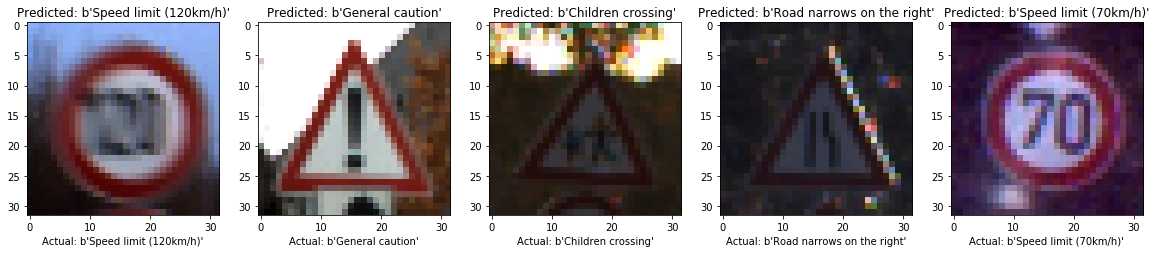

In [20]:
#Show Correct Predictions
show_example_predictions(predictions, X_test, y_test, False)

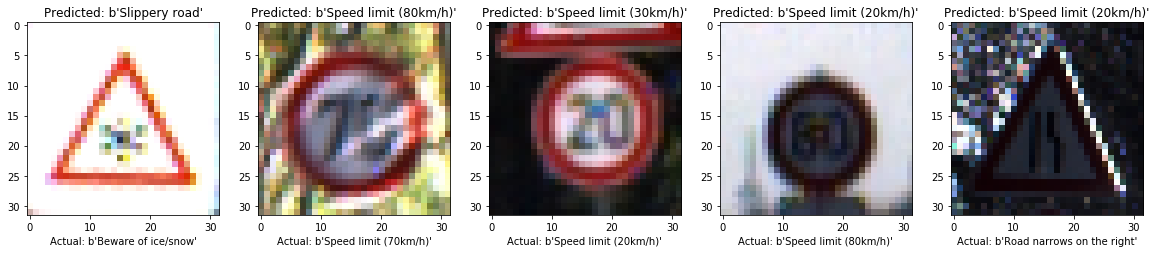

In [21]:
#Show Incorrect Predictions
show_example_predictions(predictions, X_test, y_test, True)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:

# show couple of random images from the given set
def show_output_predictions(preds, features, labels):

    # reverse one hot encoding
    predicted_labels = np.argmax(np.round(preds), axis=1)
    
    indices = [i for i, x in enumerate(predicted_labels) ]
    print (indices)
    if len(indices) ==0: 
        return

    # show an image from each class in a grid
    plt.subplots(figsize=(20, 35))
    for i in range(len(labels)):
        image_id = indices[i]
        
        plt.subplot(150 + 1 + i)
        plt.imshow(toimage(features[image_id]))

        label_id = predicted_labels[image_id]
        predicted_title = signnames['SignName'][label_id]

        plt.title("Predicted: {}".format(predicted_title))
        


In [23]:
# Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
import cv2

plt.close('all')

path = '../images/'
X_new = []

images = listdir(path)
#images = listdir(path + '*.jpg')
for inp in enumerate(images):
    try:
        img = cv2.imread(path + inp[1])
        #img = cv2.resize(img, (32, 32))
        X_new.append(normalize(img))
    except Exception as x:
        continue
        
X_new = np.asarray(X_new)



### Predict the Sign Type for Each Image

[0, 1, 2, 3, 4]


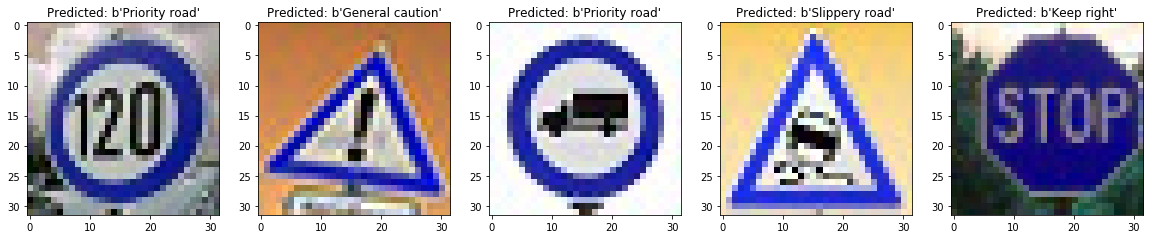

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

predicts = loaded_model.predict(X_new)
y_new = np.argmax(np.round(predicts), axis=1)

show_output_predictions(predicts, X_new, y_new)

### Analyze Performance

In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#Only two images from the web are showing proper labels so far, overall accuracy is not that good due to the high noise factor in the training data

correct_labels = 2
test_accuracy = (correct_labels/(len(X_new))*100)
print ("Test run accuracy: {}".format(test_accuracy))

Test run accuracy: 40.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  9.52292681e-01,   3.82436328e-02,   4.96724667e-03,
          1.77352980e-03,   1.18477270e-03],
       [  7.23822713e-01,   2.30459750e-01,   2.97074802e-02,
          9.23589244e-03,   6.53169490e-03],
       [  9.70897615e-01,   9.73596610e-03,   9.55013279e-03,
          6.59459876e-03,   3.22070112e-03],
       [  9.69515979e-01,   2.94511952e-02,   9.07670357e-04,
          1.18665062e-04,   3.14671502e-06],
       [  7.56104052e-01,   1.75313324e-01,   4.44463305e-02,
          1.50591824e-02,   6.32473687e-03]], dtype=float32), indices=array([[12,  0, 17, 40, 26],
       [18, 38, 37, 26, 33],
       [12, 41, 16, 18, 40],
       [23, 11, 30, 19, 41],
       [38, 36, 33, 34, 40]], dtype=int32))
[0, 1, 2, 3, 4]


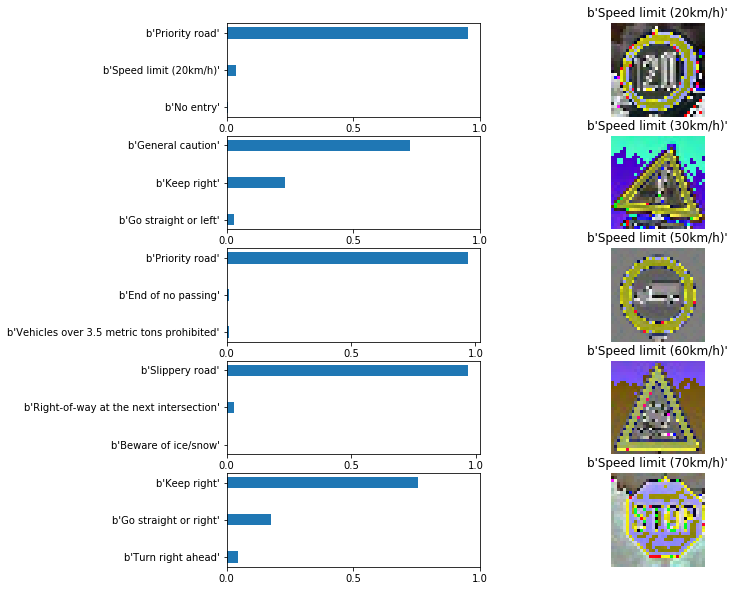

In [82]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf

# show couple of random images from the given set
def show_topn_predictions(predictions, features, labels, k=3):
    label_names = signnames['SignName']
    label_ids = signnames['ClassId']

    # reverse one hot encoding
    predicted_labels = np.argmax(np.round(predictions), axis=1)
    
    with tf.Session() as sess:
        topN = sess.run(tf.nn.top_k(tf.constant(predictions), k))
        print(top5)
        #print(predictions)
    
    #return
    
    indices = [i for i, x in enumerate(predicted_labels) ]
    print (indices)
    if len(indices) ==0: 
        return
    
    plt.close('all')
    
    fig, axies = plt.subplots(nrows=len(labels), ncols=2, figsize=(10,10))
    #fig.tight_layout()
    
    n_predictions = k
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, topN.indices, topN.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][1].imshow(feature)
        axies[image_i][1].set_title(correct_name)
        axies[image_i][1].set_axis_off()

        axies[image_i][0].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][0].set_yticks(ind + margin)
        axies[image_i][0].set_yticklabels(pred_names[::-1])
        axies[image_i][0].set_xticks([0, 0.5, 1.0])
  
   
    
show_topn_predictions(predicts, X_new, y_new, 3)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [54]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

from keras.models import Model


test_img = "../images/0.jpg"

def visualize_model_layer_output(layer_name, activation_min=-1, activation_max=-1 ,plt_num=1):
    vixModel = Model(input=loaded_model.input, output=loaded_model.get_layer(layer_name).output)

    img = cv2.imread(test_img)
    #convert to array of single image
    img = np.expand_dims(normalize(img), axis=0)
    #img = np.expand_dims(img, axis=0)

    activation = vixModel.predict(img)
    print("activation features shape: ", activation.shape)
    
    # plot features
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,20))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

activation features shape:  (1, 32, 32, 3)


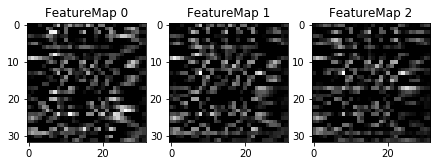

In [55]:
visualize_model_layer_output("conv1")


activation features shape:  (1, 64, 32, 3)


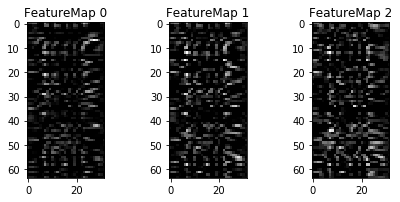

In [56]:
visualize_model_layer_output("conv2")


activation features shape:  (1, 64, 32, 3)


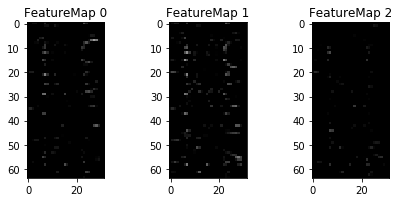

In [57]:
visualize_model_layer_output("drop2", 2, 10, 1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

Feature maps have been bit confusing to use. Need to run more experiments to get a sense of predicting patterns from the feature maps

The German traffic signs data image data has too much noise in it with very unclear images, making the task harder